In [219]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
import os
import shutil

Guardar imágen de referencia y capturar imagen actual

In [220]:
def obtenerFrames(ruta, carpeta):
    cap = cv2.VideoCapture(ruta)

    if not cap.isOpened():
        print("Error al abrir el video.")
        exit()

    frame_count = 0

    # Crear una carpeta para almacenar los frames si no existe
    folder_name = carpeta
    if os.path.exists(folder_name):
        shutil.rmtree(folder_name)  # Eliminar la carpeta y su contenido
    os.makedirs(folder_name)

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Guardar una imagen cada 10 frames
        if frame_count % 10 == 0:
            name = os.path.join(folder_name, f'frame{frame_count}.jpg')
            cv2.imwrite(name, frame)

        frame_count += 1

    cap.release()

    print("Completado.")

# para el video 1
obtenerFrames('videos/nofi001.mp4', 'video1')

# para el video 2
obtenerFrames('videos/nofi006.mp4', 'video2')

# para el video 3
obtenerFrames('videos/nofi069.mp4', 'video3')


Completado.
Completado.


Completado.


Hacer la sustracción de las imágenes

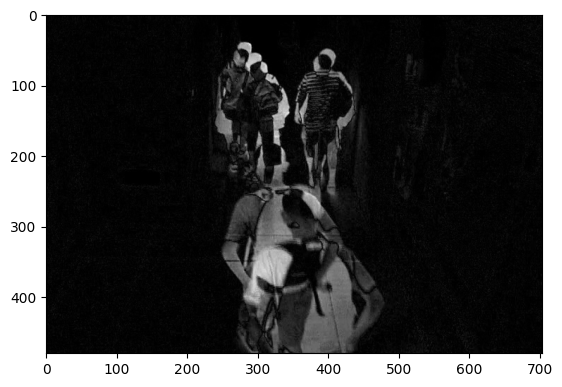

In [221]:
def resta(referencia, actual):
     ref = cv2.imread(referencia, cv2.IMREAD_GRAYSCALE)
     act = cv2.imread(actual, cv2.IMREAD_GRAYSCALE)

     alto, ancho = ref.shape

     resta = np.zeros((alto, ancho), dtype=np.int32)
     for i in range(alto):
          for j in range(ancho):
               resta[i, j] = abs(int(act[i, j]) - int(ref[i, j]))

               # se asegura de que no se salgan de los limites
               if resta[i,j] > 255:
                    resta[i,j] = 255
     
     img_resta = Image.fromarray(np.uint8(resta))

     cv2.imwrite('resta.jpg',resta)


     plt.imshow(img_resta, cmap='gray')

     return resta


ressta = resta('video3/frame30.jpg', 'video3/frame30.jpg')

Umbralizar (Bernsen)

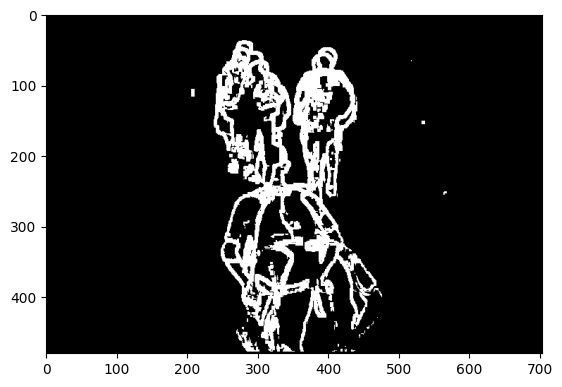

In [222]:
def umbralizacion_bernsen(imagen, kernel, umbral):
    alto, ancho = imagen.shape  
    resultado = np.zeros_like(imagen)   # hace una matriz de 0 del tamaño de la imagen

    radio = kernel // 2    # hace una division con un resultado entero para saber el radio del kernel

    for x in range(radio, alto - radio): # se hace la convolucion de la ventana
        for y in range(radio, ancho - radio):
            ventana = imagen[x - radio:x + radio + 1,
                             y - radio:y + radio + 1]
            
            min_pixel = np.min(ventana) # obtiene el minimo pixel 
            max_pixel = np.max(ventana) # obtiene el maximo pixel 

            if max_pixel - min_pixel <= umbral: # si la suma de ellos es menor al umbral...
                resultado[x, y] = 0
            else:
                resultado[x, y] = 255

    img_bernsen = Image.fromarray(resultado)

    cv2.imwrite('bernsen.jpg',resultado)

    plt.imshow(img_bernsen, cmap='gray')

    return resultado

umbralizada = umbralizacion_bernsen(ressta, 5, 45)

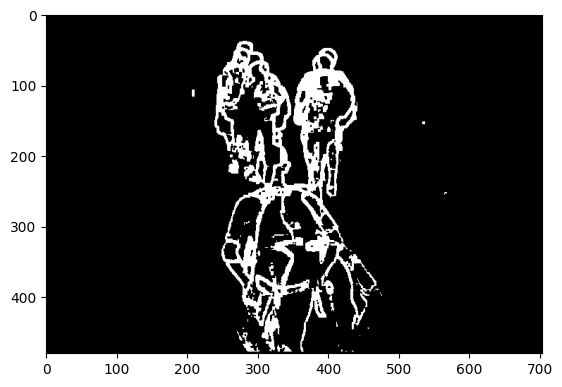

In [223]:
kernel = np.ones((2, 2), np.uint8)

umbralizada = umbralizada.astype(np.uint8)

erosion = cv2.erode(umbralizada, kernel, iterations = 1)

plt.imshow(erosion, cmap='gray')


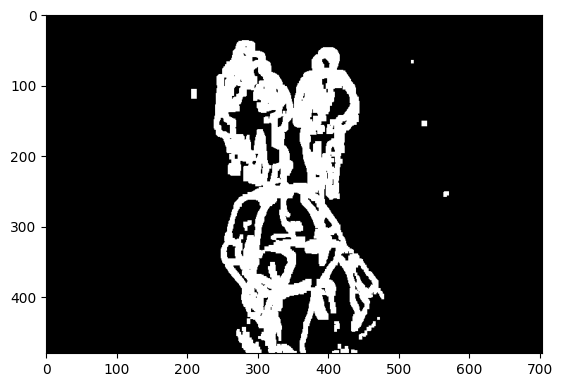

In [224]:
dilatacion = cv2.dilate(umbralizada, kernel, iterations = 3)

plt.imshow(dilatacion, cmap='gray')


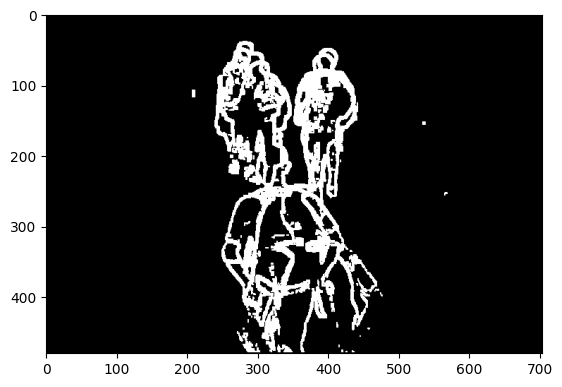

In [225]:
apertura = cv2.morphologyEx(umbralizada, cv2.MORPH_OPEN, kernel)
plt.imshow(apertura, cmap='gray')


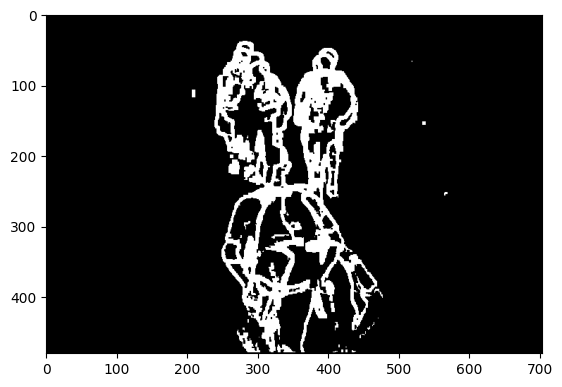

In [226]:
clausura = cv2.morphologyEx(umbralizada, cv2.MORPH_CLOSE, kernel)
plt.imshow(clausura, cmap='gray')
